<a href="https://colab.research.google.com/github/roselain3/ACE-CSV/blob/main/acefixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 , Remove metadata from ACE files

In [40]:
files_list = []
import os
def get_files():
    try:
        all_entries = os.listdir(".")
        files = [entry for entry in all_entries if os.path.isfile(os.path.join(".", entry))]
        print("Files in the folder:")
        for file_name in files:
            print(file_name)
            files_list.append(file_name)
    except FileNotFoundError:
        print("Error: Folder not found at '{""}'")

get_files()
print(files_list)

Files in the folder:
ACE_SW_Proton_Data_2017.txt
ACE_SW_Proton_Data_2003.txt
sample_corrected.zip
ACE_SW_Proton_Data_1998.txt
ACE_SW_Proton_Data_2013.txt
ACE_SW_Proton_Data_2015.txt
ACE_SW_Proton_Data_2021.txt
ACE_SW_Proton_Data_2014.txt
ACE_SW_Proton_Data_2012.txt
ACE_SW_Proton_Data_2005.txt
ACE_SW_Proton_Data_1999.txt
ACE_SW_Proton_Data_2008.txt
ACE_SW_Proton_Data_2009.txt
ACE_SW_Proton_Data_2002.txt
ACE_SW_Proton_Data_2007.txt
ACE_SW_Proton_Data_2004.txt
ACE_SW_Proton_Data_2010.txt
ACE_SW_Proton_Data_2001.txt
ACE_SW_Proton_Data_2016.txt
ACE_SW_Proton_Data_2011.txt
['ACE_SW_Proton_Data_2017.txt', 'ACE_SW_Proton_Data_2003.txt', 'sample_corrected.zip', 'ACE_SW_Proton_Data_1998.txt', 'ACE_SW_Proton_Data_2013.txt', 'ACE_SW_Proton_Data_2015.txt', 'ACE_SW_Proton_Data_2021.txt', 'ACE_SW_Proton_Data_2014.txt', 'ACE_SW_Proton_Data_2012.txt', 'ACE_SW_Proton_Data_2005.txt', 'ACE_SW_Proton_Data_1999.txt', 'ACE_SW_Proton_Data_2008.txt', 'ACE_SW_Proton_Data_2009.txt', 'ACE_SW_Proton_Data_2002.txt'

In [ ]:
import csv
with open("ACE_SW_Proton_Data_2004.txt", 'r', newline='', encoding='utf-8') as f:
        reader = csv.reader(f)
        for row in reader:
            print(row)

In [42]:
import csv
import os


def file_corrector(file_name):
  file_to_fix = file_name
  output_file = os.path.join("sample_corrected", file_to_fix)
  # Make sure the folder exists
  os.makedirs("sample_corrected", exist_ok=True)

  with open(file_to_fix, 'r', newline='', encoding='utf-8') as f, \
      open(output_file, 'w', newline='', encoding='utf-8') as laney:

      reader = csv.reader(f, skipinitialspace=True)  # adjust delimiter if needed
      writer = csv.writer(laney)

      for lineno, row in enumerate(reader, start=1):
          if lineno >= 36:     # keep only lines 36+
              writer.writerow(row)




In [ ]:
for each in files_list:
  file_corrector(each)

In [ ]:
!zip -r sample_corrected.zip sample_corrected

# Step 2 , Convert txt to csv

In [ ]:
import csv

input_file = "./sample_corrected/ACE_SW_Proton_Data_1998.txt"
output_file = "./sample_corrected/ACE_SW_Proton_Data_1998.csv"

with open(input_file, "r", encoding="utf-8") as infile, \
     open(output_file, "w", newline="", encoding="utf-8") as outfile:

    # Split on any whitespace (spaces, tabs, multiple spaces, etc.)
    writer = csv.writer(outfile)

    for line in infile:
        # Strip leading/trailing spaces/newlines, then split by whitespace
        row = line.strip().split()
        if row:  # skip empty lines
            writer.writerow(row)


In [51]:
import csv

def convert_value(x):

    try:
        if "." in x:   # float check
            return float(x)
        else:
            return int(x)
    except ValueError:
        return x  # leave it as string if not numeric

# ACE_SW_Proton_Data_1998
def txt_to_csv(txt_file):
   txt_file_modified = txt_file.removesuffix(".txt")
   input_file = f"./sample_corrected/{txt_file_modified}.txt"
   output_file = f"./sample_corrected_csv/{txt_file_modified}.csv"
   with open(input_file, "r", encoding="utf-8") as infile, \
      open(output_file, "w", newline="", encoding="utf-8") as outfile:

      writer = csv.writer(outfile)

      for line in infile:
          row = line.strip().split()
          if row:  # skip empty lines
              converted = [convert_value(val) for val in row]
              writer.writerow(converted)


txt_to_csv("./ACE_SW_Proton_Data_1998")

In [7]:
files_list_corrected = []
import os
def get_files():
    try:
        all_entries = os.listdir("/content/sample_corrected_csv")
        files = [entry for entry in all_entries if os.path.isfile(os.path.join(".", entry))]
        print("Files in the folder:")
        for file_name in files:
            print(file_name)
            files_list_corrected.append(file_name)
    except FileNotFoundError:
        print("Error: Folder not found at '{""}'")

get_files()
print(files_list_corrected)

Files in the folder:
[]


In [52]:
for each in files_list_corrected:
  txt_to_csv(each)

In [ ]:
!zip -r sample_corrected_csv.zip sample_corrected_csv

In [58]:
file_one_data = ""
with open("/content/sample_corrected_csv/ACE_SW_Proton_Data_1998.csv", "r", encoding="utf-8") as file_one:
    reader = csv.reader(file_one)
    file_one_data = list(reader)

file_two_data = ""
with open("/content/sample_corrected_csv/ACE_SW_Proton_Data_1998.csv", "r", encoding="utf-8") as file_two:
    reader = csv.reader(file_two)
    file_two_data = list(reader)

print(file_one_data)
print(file_two_data)




[['1998', '28', '0', '0', '-9999.9', '-9999.9'], ['1998', '28', '0', '12', '-9999.9', '-9999.9'], ['1998', '28', '0', '24', '-9999.9', '-9999.9'], ['1998', '28', '0', '36', '-9999.9', '-9999.9'], ['1998', '28', '0', '48', '-9999.9', '-9999.9'], ['1998', '28', '1', '0', '-9999.9', '-9999.9'], ['1998', '28', '1', '12', '-9999.9', '-9999.9'], ['1998', '28', '1', '24', '-9999.9', '-9999.9'], ['1998', '28', '1', '36', '-9999.9', '-9999.9'], ['1998', '28', '1', '48', '-9999.9', '-9999.9'], ['1998', '28', '2', '0', '-9999.9', '-9999.9'], ['1998', '28', '2', '12', '-9999.9', '-9999.9'], ['1998', '28', '2', '24', '-9999.9', '-9999.9'], ['1998', '28', '2', '36', '-9999.9', '-9999.9'], ['1998', '28', '2', '48', '-9999.9', '-9999.9'], ['1998', '28', '3', '0', '-9999.9', '-9999.9'], ['1998', '28', '3', '12', '-9999.9', '-9999.9'], ['1998', '28', '3', '24', '-9999.9', '-9999.9'], ['1998', '28', '3', '36', '-9999.9', '-9999.9'], ['1998', '28', '3', '48', '-9999.9', '-9999.9'], ['1998', '28', '4', '0'

In [59]:
import csv

# Assuming merged_data is already created as in your previous code
merged_data = file_one_data + file_two_data  # skip second header

output_file = "/content/mega_merged.csv"

with open(output_file, "w", newline="", encoding="utf-8") as out:
    writer = csv.writer(out)
    writer.writerows(merged_data)

print("Mega merged CSV saved as:", output_file)


Mega merged CSV saved as: /content/mega_merged.csv


In [5]:
import csv
def grab_file_data(file_name):
  with open(f"{file_name}", "r", encoding="utf-8") as file:
      reader = csv.reader(file)
      return list(reader)


In [6]:
merged_data = grab_file_data("mega_merged.csv")
header = ["Year", "Day", "Hour", "Minute", "proton_density", "proton_speed"]
merged_with_header = [header] + merged_data
output_file = "/content/mega_merged_v2.csv"

with open(output_file, "w", newline="", encoding="utf-8") as out:
    writer = csv.writer(out)
    writer.writerows(merged_with_header)

print("Mega merged CSV saved as:", output_file)

Mega merged CSV saved as: /content/mega_merged_v2.csv


In [20]:
all_data = []

for each in files_list_corrected_csv:
  all_data += grab_file_data(each)

In [2]:
output_file = "/content/mega_merged.csv"
header = ["Year", "Day", "Hour", "Minute", "proton_density", "proton_speed"]
merged_with_header = [header] + all_data
with open(output_file, "w", newline="", encoding="utf-8") as out:
    writer = csv.writer(out)
    writer.writerows(merged_with_header)

print("Mega merged CSV saved as:", output_file)

NameError: name 'all_data' is not defined

In [19]:
files_list_corrected_csv = []
import os
def get_files():
    try:
        all_entries = os.listdir("sample_corrected_csv")
        # files = all_entries
        files = [entry for entry in all_entries if os.path.isfile(os.path.join("./sample_corrected_csv", entry))]
        print("Files in the folder:")
        for file_name in files:
            print(file_name)
            files_list_corrected_csv.append(file_name)
    except FileNotFoundError:
        print("Error: Folder not found at '{""}'")

get_files()
print(files_list_corrected_csv)

Files in the folder:
ACE_SW_Proton_Data_2011.csv
ACE_SW_Proton_Data_2003.csv
ACE_SW_Proton_Data_2021.csv
ACE_SW_Proton_Data_2013.csv
ACE_SW_Proton_Data_2008.csv
ACE_SW_Proton_Data_2009.csv
ACE_SW_Proton_Data_2015.csv
ACE_SW_Proton_Data_1998.csv
ACE_SW_Proton_Data_2017.csv
ACE_SW_Proton_Data_2010.csv
ACE_SW_Proton_Data_2014.csv
ACE_SW_Proton_Data_2005.csv
ACE_SW_Proton_Data_2007.csv
ACE_SW_Proton_Data_2002.csv
ACE_SW_Proton_Data_1999.csv
ACE_SW_Proton_Data_2012.csv
ACE_SW_Proton_Data_2016.csv
ACE_SW_Proton_Data_2001.csv
ACE_SW_Proton_Data_2004.csv
['ACE_SW_Proton_Data_2011.csv', 'ACE_SW_Proton_Data_2003.csv', 'ACE_SW_Proton_Data_2021.csv', 'ACE_SW_Proton_Data_2013.csv', 'ACE_SW_Proton_Data_2008.csv', 'ACE_SW_Proton_Data_2009.csv', 'ACE_SW_Proton_Data_2015.csv', 'ACE_SW_Proton_Data_1998.csv', 'ACE_SW_Proton_Data_2017.csv', 'ACE_SW_Proton_Data_2010.csv', 'ACE_SW_Proton_Data_2014.csv', 'ACE_SW_Proton_Data_2005.csv', 'ACE_SW_Proton_Data_2007.csv', 'ACE_SW_Proton_Data_2002.csv', 'ACE_SW_Prot

# Step 3 , Plotting the data for analysis

In [1]:
!unzip sample_corrected_csv.zip

Archive:  sample_corrected_csv.zip
   creating: sample_corrected_csv/
  inflating: sample_corrected_csv/ACE_SW_Proton_Data_2011.csv  
  inflating: sample_corrected_csv/ACE_SW_Proton_Data_2003.csv  
  inflating: sample_corrected_csv/ACE_SW_Proton_Data_2021.csv  
  inflating: sample_corrected_csv/ACE_SW_Proton_Data_2013.csv  
  inflating: sample_corrected_csv/ACE_SW_Proton_Data_2008.csv  
  inflating: sample_corrected_csv/ACE_SW_Proton_Data_2009.csv  
  inflating: sample_corrected_csv/ACE_SW_Proton_Data_2015.csv  
   creating: sample_corrected_csv/.ipynb_checkpoints/
  inflating: sample_corrected_csv/ACE_SW_Proton_Data_1998.csv  
  inflating: sample_corrected_csv/ACE_SW_Proton_Data_2017.csv  
  inflating: sample_corrected_csv/ACE_SW_Proton_Data_2010.csv  
  inflating: sample_corrected_csv/ACE_SW_Proton_Data_2014.csv  
  inflating: sample_corrected_csv/ACE_SW_Proton_Data_2005.csv  
  inflating: sample_corrected_csv/ACE_SW_Proton_Data_2007.csv  
  inflating: sample_corrected_csv/ACE_SW_Pro

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd

# Load a CSV file into a DataFrame
df = pd.read_csv('mega_merged_v2.csv')

# Print the first few rows of the DataFrame
print(df.head())

   Year  Day  Hour  Minute  proton_density  proton_speed
0  2011    1     0       0           3.574        338.55
1  2011    1     0      12           3.263        342.90
2  2011    1     0      24           4.598        343.08
3  2011    1     0      36           4.781        342.90
4  2011    1     0      48           4.147        344.07


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load a CSV file into a DataFrame
df = pd.read_csv('mega_merged_v2.csv')

# Print the first few rows of the DataFrame
print(df.head())
sns.pairplot(df)
plt.show()

   Year  Day  Hour  Minute  proton_density  proton_speed
0  2011    1     0       0           3.574        338.55
1  2011    1     0      12           3.263        342.90
2  2011    1     0      24           4.598        343.08
3  2011    1     0      36           4.781        342.90
4  2011    1     0      48           4.147        344.07


KeyboardInterrupt: 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


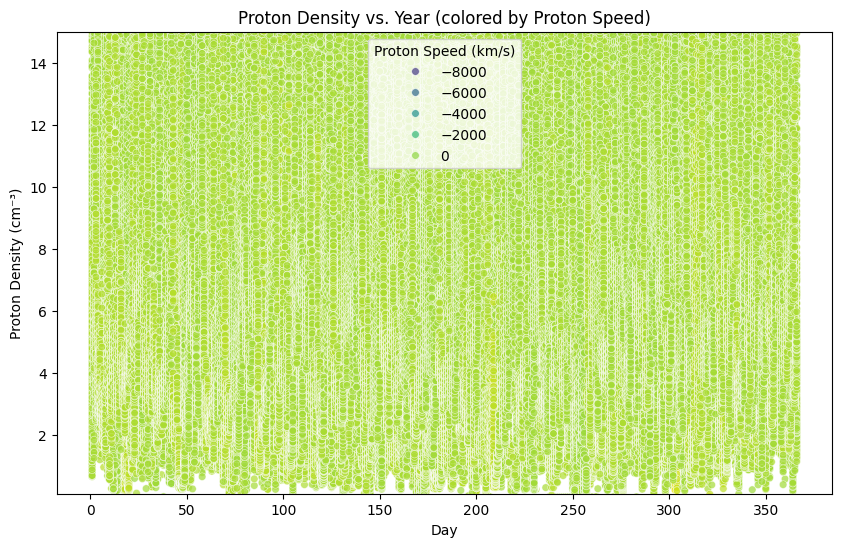

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df,
    x="Day",
    y="proton_density",
    hue="proton_speed",
    palette="viridis",
    s=30,              # marker size (increase if too small)
    alpha=0.7          # transparency so overlapping points are visible
)

plt.title("Proton Density vs. Year (colored by Proton Speed)")
plt.xlabel("Day")
plt.ylabel("Proton Density (cm⁻³)")

# set y-axis limits
plt.ylim(0.1, 15)

plt.legend(title="Proton Speed (km/s)")
plt.show()
